In [1]:
##Trying a model to detect handwritten text in images

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models #type:ignore

# 1. Load the MNIST dataset
# MNIST has 60,000 training and 10,000 test images of handwritten digits (28x28 grayscale)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

2025-07-19 23:04:25.403288: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-19 23:04:25.421956: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-19 23:04:25.554082: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-19 23:04:25.689190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752955465.808045  193250 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752955465.84

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


In [3]:
# 2. Preprocess the data
# Normalize pixel values from [0, 255] to [0.0, 1.0]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Add a channel dimension (since images are grayscale, channel=1)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [4]:
# 3. Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

/home/okema-paul-mark/Documents/machine_learning/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-19 23:06:26.996181: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
# 4. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# 5. Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8740 - loss: 0.4304 - val_accuracy: 0.9805 - val_loss: 0.0645
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9810 - loss: 0.0610 - val_accuracy: 0.9885 - val_loss: 0.0443
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9875 - loss: 0.0425 - val_accuracy: 0.9873 - val_loss: 0.0473
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9909 - loss: 0.0292 - val_accuracy: 0.9897 - val_loss: 0.0407
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9924 - loss: 0.0253 - val_accuracy: 0.9888 - val_loss: 0.0379


In [7]:
# 6. Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9851 - loss: 0.0440
Test accuracy: 0.9886


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


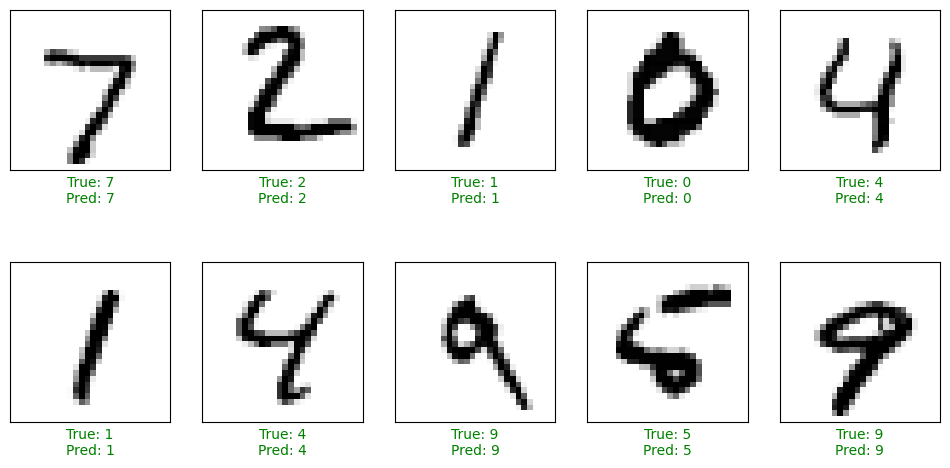

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions on test images
predictions = model.predict(test_images)  # shape: (10000, 10) probs per class
predicted_labels = np.argmax(predictions, axis=1)

# Plot first 10 test images with their predicted and true labels
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)

    true_label = test_labels[i]
    pred_label = predicted_labels[i]
    color = "green" if pred_label == true_label else "red"
    plt.xlabel(f"True: {true_label}\nPred: {pred_label}", color=color)
plt.show()
